In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot_utils import plot_event_history

In [5]:
WTP = "$WTP_{i,w}$"

In [6]:
# evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv").dropna().sort_values(by="event")
price_matrix = pd.read_csv("price_matrix.csv")
pso_log = pd.read_csv("pso_log.csv")
# random_search_log = pd.read_csv("random_search_log.csv")


num_customers = event_history.customer.max() + 1

event_history['welfare'] = 0
event_history.loc[event_history.event == 'sold', 'welfare'] = event_history['customer_wtp'] - event_history['price']
event_history['profit'] = 0
event_history.loc[event_history.event == 'sold', 'profit'] = event_history['price']

In [4]:
final_events = event_history.sort_values(by=['event'], ascending=False).drop_duplicates(subset=['run_id', 'customer'])

In [52]:
final_events.groupby(['run_id', 'group']).agg(
    welfare=('welfare', 'sum'),
    avg_price=('price', 'mean'),
    num_customers=('customer', 'nunique'),
    num_sold=('event', lambda x: (x == 'sold').sum()),
    avg_wtp=('customer_wtp', 'mean'),
    profit=('profit', 'sum'),
).to_csv("final_events.csv")

In [ ]:
sns.histplot(
    data=event_history.loc[event_history.event == 'sold'],
    x='welfare',
    bins=50,
    color='blue',
    label='Welfare Distribution',
    hue='run_id'
)

In [ ]:
event_history.loc[event_history.event == 'sold']['welfare'].hist(bins=50)

In [9]:
fitness_dist_es = evolution_log.drop_duplicates(subset=["individual"])

## Random Search

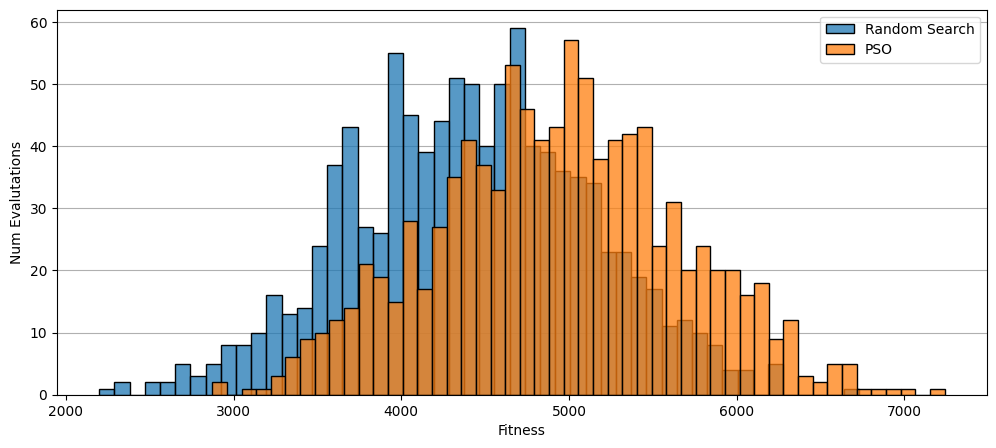

In [40]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=random_search_log.fitness, ax=ax, bins=50)
sns.histplot(data=pso_log.current_fitness, ax=ax, bins=50)
# sns.histplot(data=fitness_dist_es, ax=ax, bins=50)

ax.grid(axis="y")
ax.set_axisbelow(True)

ax.set_xlabel("Fitness")
ax.set_ylabel("Num Evalutations")
ax.legend(["Random Search", "PSO", "Evolution Strategy"])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=random_search_log,
    x="evaluation",
    y="fitness",  
    ax=ax
)
sns.lineplot(
    data=pso_log,
    x="num_evals",
    y="current_fitness",  
    ax=ax
)
sns.lineplot(data=fitness_dist_es, 
    x="generation",
    y="score",  
    ax=ax
)
ax.grid(axis="y")
ax.legend(["Random Search", "PSO", "Evolution Strategy"])

In [ ]:
event_history.loc[event_history.event == 'quit'].groupby('run_id').agg(
    quit_count=('customer', lambda x: len(x.unique()) / num_customers),
)

In [37]:
run_summary = evolution_log.groupby(["run_id", "loss_aversion"]).agg(
    {"score": "max"}
).reset_index()

## Event History

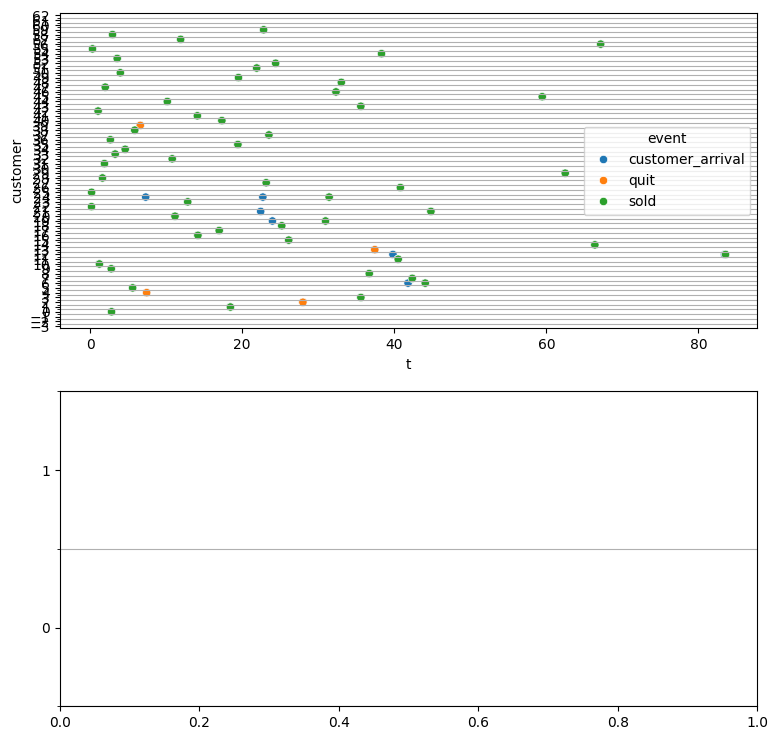

In [4]:



fig, axs = plt.subplots(2,1, figsize=(9, 9))
plot_event_history(axs[0], event_history.loc[event_history.run_id == 0])
plot_event_history(axs[1], event_history.loc[event_history.run_id == 1])


In [28]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]
fig, ax = plt.subplots(figsize=(9, 9))
sns.swarmplot(
    x="group", 
    y="customer_wtp", 
    data=quit_sold, 
    ax=ax, 
    # label="customer_wtp", 
    # hue="event"
    )
sns.swarmplot(
    x="group", 
    y="price", 
    data=quit_sold, 
    ax=ax, 
    # label="price", 
    # hue="event"
    )
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

NameError: name 'event_history' is not defined

In [9]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]

NameError: name 'quit_sold' is not defined

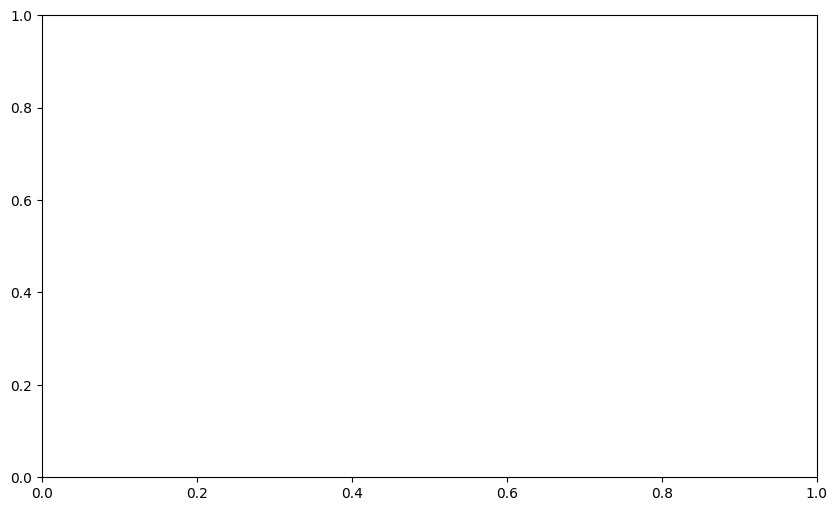

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="customer", y="price", data=quit_sold, color='blue', label='price', ax=ax)
sns.scatterplot(
    x="customer", y="customer_wtp", data=quit_sold, color='red', label='customer_wtp', ax=ax
)
sns.scatterplot(
    x="customer", y="customer_max_wtp", data=quit_sold, color='green', label='customer_max_wtp', ax=ax
)
plt.legend()

## Customer Init

In [ ]:
customers = event_history.drop_duplicates(subset=["customer"])

fig, ax = plt.subplots(figsize=(10, 6))

# First plot the scatter points
sns.scatterplot(
    x="customer",
    y="customer_wtp",
    data=customers,
    hue="group",
    label="WTP",
    palette="viridis",
    alpha=0.5,
)
sns.scatterplot(
    x="customer",
    y="customer_max_wtp",
    data=customers,
    hue="group",
    label="Max WTP",
    palette="viridis",
    alpha=1,
)

# Add lines connecting the points for each customer
for _, customer in customers.iterrows():
    ax.plot(
        [customer.customer, customer.customer],
        [customer.customer_wtp, customer.customer_max_wtp],
        color="gray",
        alpha=0.3,
        linestyle="-",
    )

ax.set_xlabel("Customer")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

## WTP changes

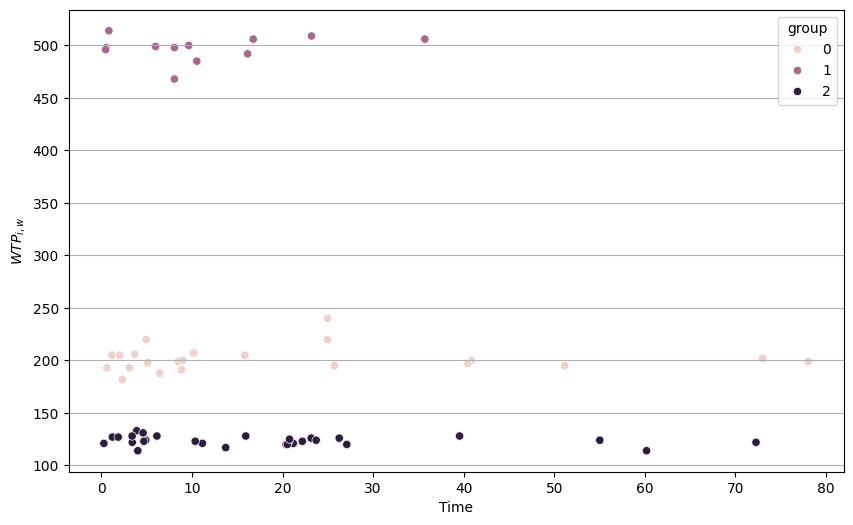

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    x="t", 
    y="customer_wtp", 
    data=event_history.loc[event_history.run_id == 0], 
    hue="group")
ax.set_xlabel("Time")
ax.set_ylabel(WTP)
ax.grid(axis="y")
plt.show()

# Sensitivity Analysis

## Comma vs Plus

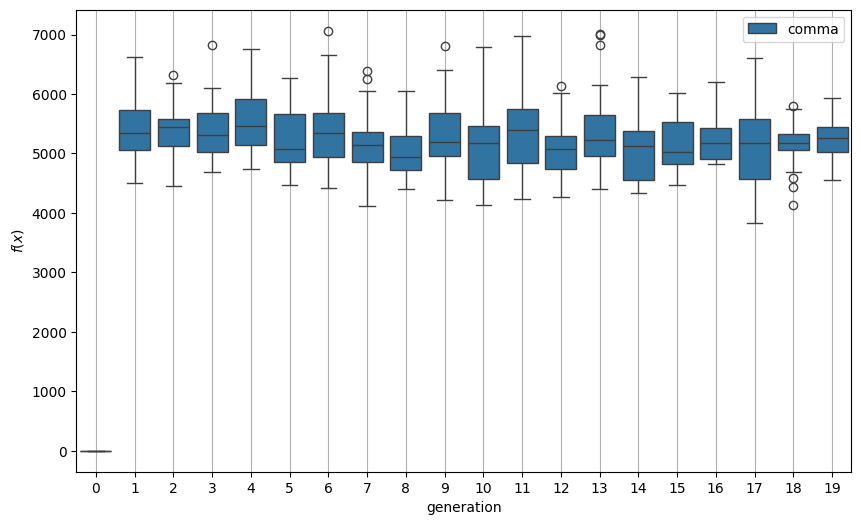

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    x="generation",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="selection",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

## Steady State ES

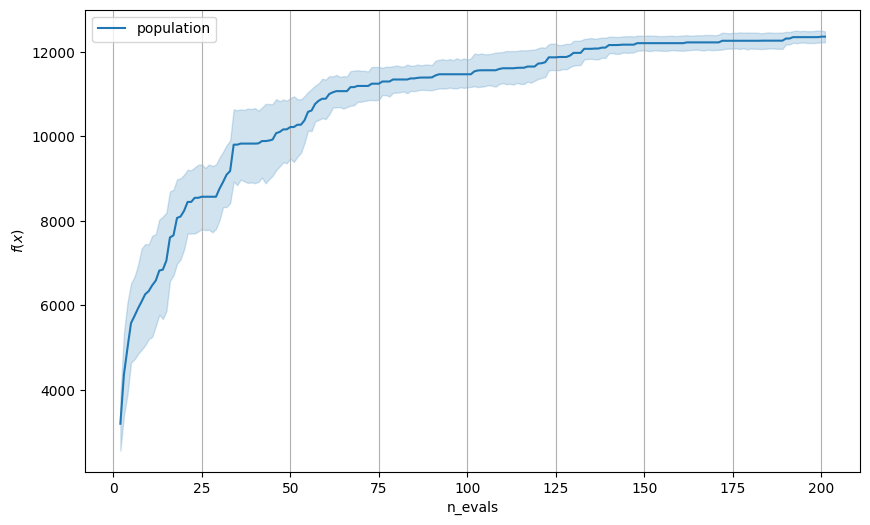

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="type",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

<Axes: xlabel='n_evals', ylabel='mutation_strength'>

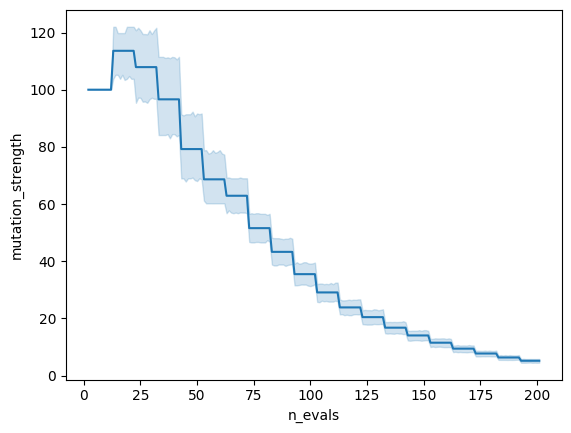

In [28]:
sns.lineplot(
    x="n_evals",
    y="mutation_strength",
    data=evolution_log.loc[evolution_log["type"] == "population"],
)

## Loss Aversion

In [22]:
run_summary = evolution_log.groupby(["run_id", "loss_aversion"]).agg(
    {"score": "max"}
).reset_index()

<Axes: xlabel='loss_aversion', ylabel='score'>

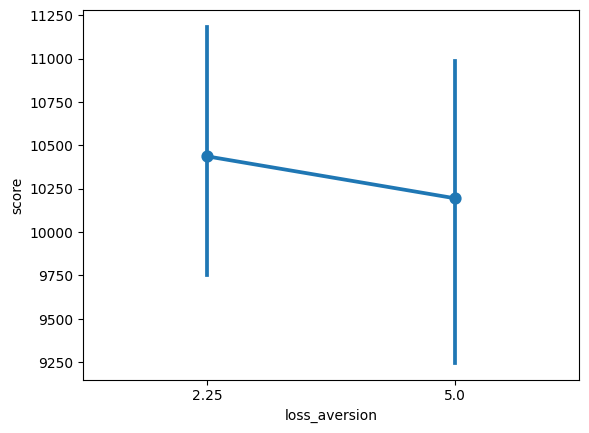

In [23]:
run_summary
sns.pointplot(
    x="loss_aversion",
    y="score",
    data=run_summary,
)

# MAB

In [22]:
mab_log = pd.read_csv("mab_log.csv")
mab_arms = pd.read_csv("mab_arms.csv")

In [23]:
mab_res = mab_log.groupby(["config_id", "run_id"]).agg(
    total_reward=('reward', 'sum'),
)

<Axes: xlabel='run_id', ylabel='total_reward'>

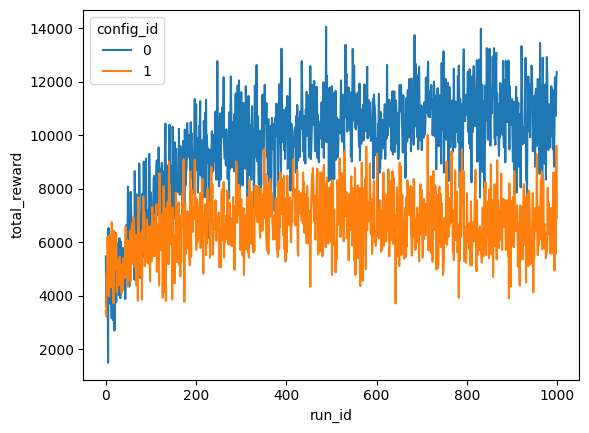

In [24]:
sns.lineplot(
    x="run_id",
    y="total_reward",
    data=mab_res,
    hue="config_id",
)   

<Axes: xlabel='t', ylabel='best_price'>

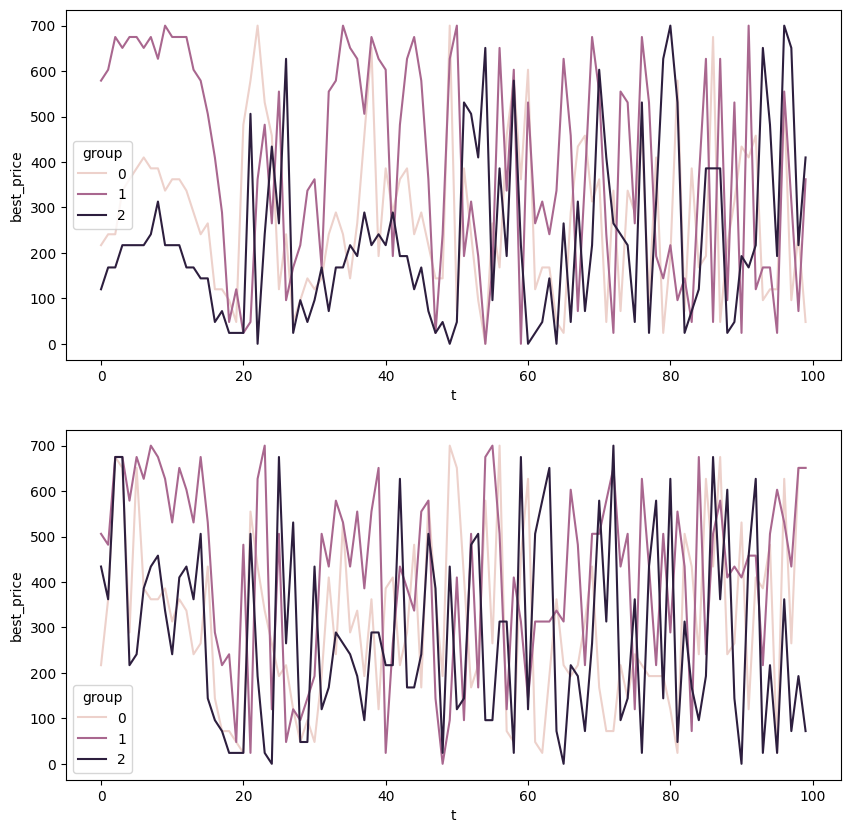

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 0],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[0],
)
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 1],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[1],
)

In [ ]:
mab_res = mab_log.groupby(["config_id", "run_id"]).agg(
    total_reward=('reward', 'sum'),
)

<Axes: xlabel='run_id', ylabel='total_reward'>

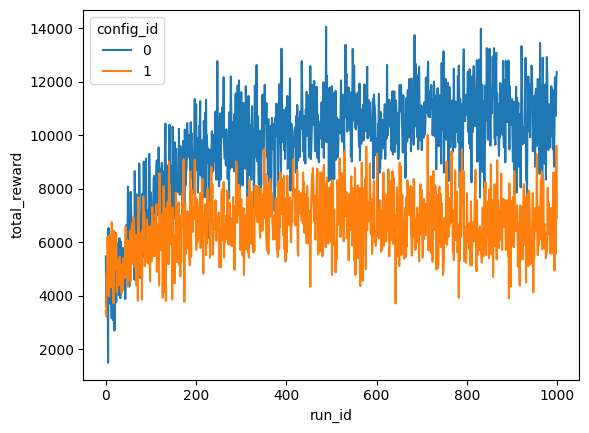

In [ ]:
sns.lineplot(
    x="run_id",
    y="total_reward",
    data=mab_res,
    hue="config_id",
)   

<Axes: xlabel='t', ylabel='best_price'>

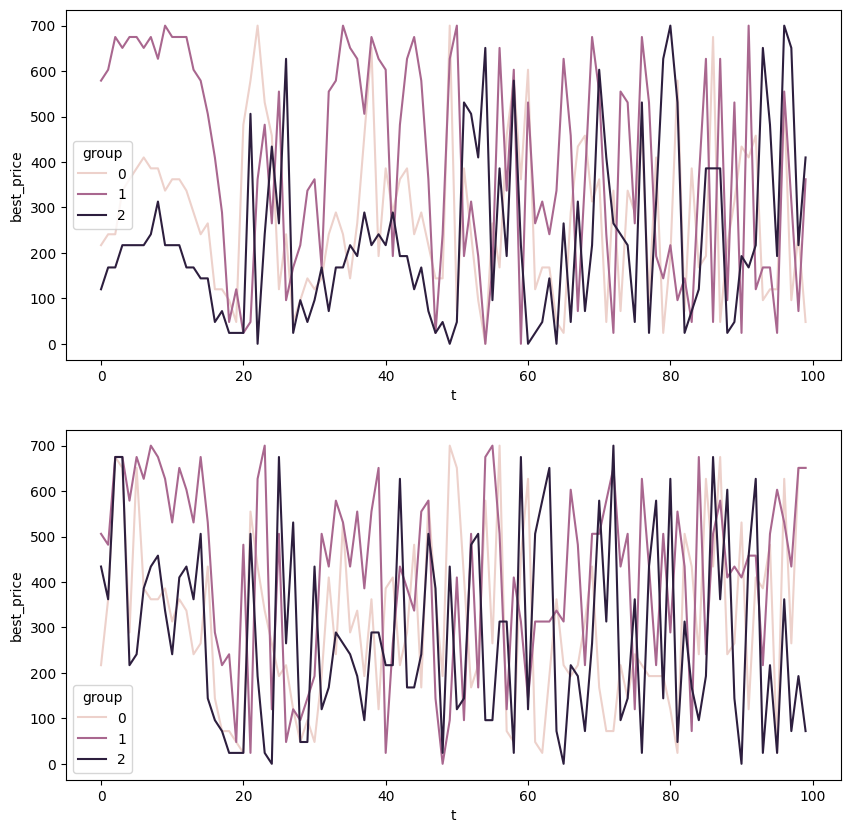

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 0],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[0],
)
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 1],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[1],
)

<Axes: xlabel='run_id', ylabel='avg_reward'>

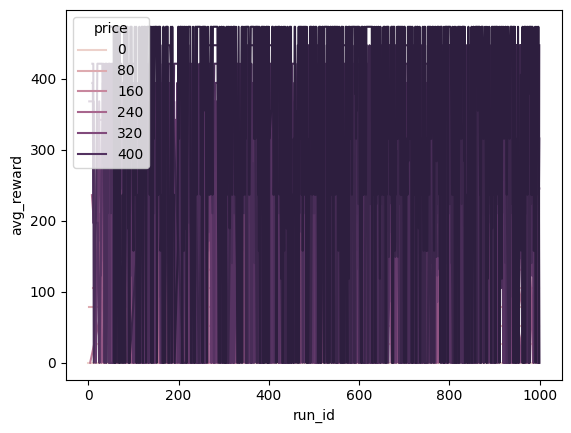